# Optimization Methods Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax import grad
from jax.scipy.optimize import minimize
import seaborn as sns
from tqdm import tqdm
from functools import partial

In [3]:
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] =  "Helvetica"

In [4]:
def objective(X, Y):
    return (X**2)/2 + (Y**4)/4

In [5]:
# Contour plot

x = np.linspace(-5, 20, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

In [6]:
# Gradient flow

GF = np.array([[17,8]])
T, eps = 10, 0.001
for i in range(int(T/eps)):
    x, y = GF[-1,0], GF[-1,1]
    GF = np.vstack([GF, GF[-1] - eps*np.array([x, y**3])])

In [7]:
# Gradient descent

GD = np.array([[17,8]])
T, eps = 10, 0.01
for i in range(int(T/eps)):
    x, y = GD[-1,0], GD[-1,1]
    GD = np.vstack([GD, GD[-1] - eps*np.array([x, y**3])])

In [8]:
# proximal point method

def objective(X, Y):
    return (X**2)/2 + (Y**4)/4
    
def moreau(y, x, f, eps):
    return f(y[0], y[1]) + (jnp.linalg.norm(y-x)**2)/(2*eps)

def proximal_point(starting_point, objective, T=10, eps=0.01):

    X_iter, f_iter = jnp.array([starting_point]), [objective(starting_point[0], starting_point[1])]


    for i in tqdm(range(int(T/eps))):

        moreau_with_center = partial(moreau, x=X_iter[-1], f=objective, eps=eps)

        # Set the initial guess for the variable to be optimized
        key = jax.random.PRNGKey(0)
        initial_guess = X_iter[-1] + jax.random.normal(key, shape=(2,))

        # Calculate the gradient of the function
        gradient = grad(moreau_with_center)

        # Use JAX's `minimize` function for optimization
        result = minimize(moreau_with_center, initial_guess, method='BFGS')

        X_iter = jnp.vstack([X_iter, result.x])
        f_iter.append(result.fun)

    return X_iter, f_iter


In [ ]:
starting_point = jnp.array([17.0, 8.0])

PP, PP_fun = proximal_point(starting_point, objective, T=10, eps=0.01)

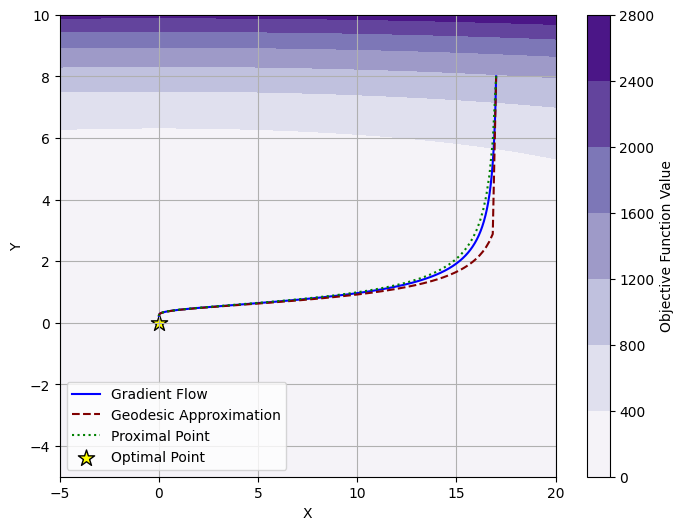

In [ ]:
# Create contour plot

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, cmap='Purples') # You can change the cmap for different color schemes
plt.colorbar(contour, label='Objective Function Value')
plt.plot(GF[:,0], GF[:,1], color='blue', label = 'Gradient Flow')
plt.plot(GD[:,0], GD[:,1], color='maroon', linestyle='--', label = 'Geodesic Approximation')
plt.plot(PP[:,0], PP[:,1], color='green', linestyle=':', label = 'Proximal Point')
plt.scatter(np.array([0.0]), np.array([0.0]), marker='*', s=150, color='yellow', edgecolors='black', label='Optimal Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

In [ ]:
T, eps, var_0 = 2, 0.1, 1.1

def GA_var(T, eps, var_0):

    var = [var_0]
    for i in range(1, int(T/eps)):
        var.append(var[-1]*(1 - eps*(1 - (1/var[-1]))/2)**2)
    return var

def SB_var(T, eps, var_0):
    var = [var_0]
    for i in range(1, int(T/eps)):
        eta = var[-1]
        C = ((eta - 1)/eta)*(np.sqrt(((eta**2)/(eta-1)**2) + (eps*eps/2.)) - (eps/2.))
        var.append(var[-1]*(C**2))
    return var

def GF_var(T, eps, var_0):

    time = eps*np.arange(0, int(T/eps))
    var = (1 - (1-var_0)*np.exp(-time))
    return var

GF_var_seq = GF_var(T, eps, var_0)
GA_var_seq = GA_var(T, eps, var_0)
SB_var_seq = SB_var(T, eps, var_0)


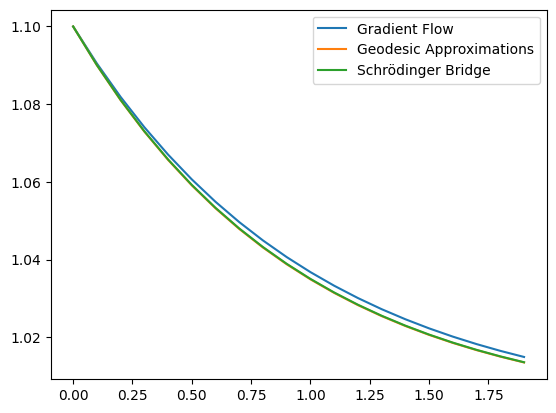

In [104]:
plt.plot(np.arange(0, T, step=eps), GF_var_seq, label = 'Gradient Flow')
plt.plot(np.arange(0, T, step=eps), GA_var_seq, label = 'Geodesic Approximations')
plt.plot(np.arange(0, T, step=eps), SB_var_seq, label='Schrödinger Bridge')

plt.legend()